In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Constants
BOARD_SIZE = 4
EMPTY = 0
PLAYER_X = 1
PLAYER_O = 2

# Create a 4x4 empty board
def create_board():
    return np.zeros((BOARD_SIZE, BOARD_SIZE), dtype=int)

# Check for win
def check_win(board, player):
    # Check rows, columns, and diagonals
    for i in range(BOARD_SIZE):
        if all([board[i, j] == player for j in range(BOARD_SIZE)]):
            return True
        if all([board[j, i] == player for j in range(BOARD_SIZE)]):
            return True
    
    if all([board[i, i] == player for i in range(BOARD_SIZE)]):
        return True
    if all([board[i, BOARD_SIZE - i - 1] == player for i in range(BOARD_SIZE)]):
        return True
    
    return False

# Check for draw
def check_draw(board):
    return not (0 in board)

# Display the board
def print_board(board):
    print(board)

# Get available moves
def get_available_moves(board):
    return [(i, j) for i in range(BOARD_SIZE) for j in range(BOARD_SIZE) if board[i, j] == EMPTY]

# Random agent's move
def random_agent_move(board, player):
    available_moves = get_available_moves(board)
    return random.choice(available_moves)

# Play move on the board
def make_move(board, move, player):
    board[move[0], move[1]] = player


In [2]:
# Dynamic Programming agent's move
# State-Action dictionary
dp_table = {}

def get_board_tuple(board):
    return tuple(map(tuple, board))  # Convert numpy array to tuple of tuples

def dynamic_agent_move(board, player):
    state = get_board_tuple(board)
    
    if state not in dp_table:
        # Initialize the state's moves
        dp_table[state] = {move: 0 for move in get_available_moves(board)}
    
    # Choose the best move based on DP table (greedy approach)
    available_moves = get_available_moves(board)
    best_move = max(available_moves, key=lambda move: dp_table[state][move])
    
    return best_move

# Update the DP table after the game
def update_dp_table(board, result, player):
    state = get_board_tuple(board)
    if state in dp_table:
        for move in dp_table[state]:
            if result == player:
                dp_table[state][move] += 1  # Reward for winning move
            else:
                dp_table[state][move] -= 1  # Penalize for losing move


In [3]:
# Play a single game between the dynamic agent and random agent
def play_game():
    board = create_board()
    current_player = PLAYER_X  # Dynamic agent starts first
    game_over = False
    result = None
    
    while not game_over:
        if current_player == PLAYER_X:
            move = dynamic_agent_move(board, current_player)
        else:
            move = random_agent_move(board, current_player)
        
        make_move(board, move, current_player)
        
        if check_win(board, current_player):
            result = current_player
            game_over = True
        elif check_draw(board):
            result = 0  # Draw
            game_over = True
        else:
            current_player = PLAYER_O if current_player == PLAYER_X else PLAYER_X
    
    # Update DP table for the dynamic agent
    update_dp_table(board, result, PLAYER_X)
    
    return result  # Return the result of the game (1 for dynamic win, 2 for random win, 0 for draw)


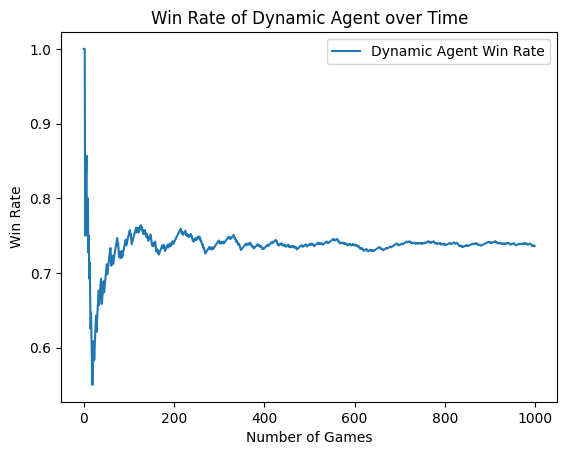

Dynamic Agent Wins: 736, Random Agent Wins: 201, Draws: 63


In [4]:
# Simulate multiple games and track win rates
def simulate_games(num_games=1000):
    dynamic_wins = 0
    random_wins = 0
    draws = 0
    win_rates = []
    
    for i in range(num_games):
        result = play_game()
        if result == PLAYER_X:
            dynamic_wins += 1
        elif result == PLAYER_O:
            random_wins += 1
        else:
            draws += 1
        
        win_rate = dynamic_wins / (i + 1)
        win_rates.append(win_rate)
    
    return win_rates, dynamic_wins, random_wins, draws

# Run simulation
num_games = 1000
win_rates, dynamic_wins, random_wins, draws = simulate_games(num_games)

# Plot win rates
plt.plot(range(num_games), win_rates, label="Dynamic Agent Win Rate")
plt.xlabel("Number of Games")
plt.ylabel("Win Rate")
plt.title("Win Rate of Dynamic Agent over Time")
plt.legend()
plt.show()

print(f"Dynamic Agent Wins: {dynamic_wins}, Random Agent Wins: {random_wins}, Draws: {draws}")
